#  Toys Data Analysis

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset from csv file

df = pd.read_csv("../DATA/toy_sales_data.csv")
df.head()

,Date,Item,Quantity,Total Sales
0,1 01 2022,Stuffed animal,50,$250
1,4 01 2022,Lego set,25,$500
2,7 01 2022,Board game,30,$450
3,13 01 2022,Doll,40,$400
4,21 01 2022,Stuffed animal,40,$200


In [3]:
# Data type of date and total sales columns
df[['Date', 'Total Sales']].dtypes

Date           object
Total Sales    object
dtype: object

In [4]:
# Data cleaning

# Convert date column to datetime
# df['Date'] = pd.to_datetime(df['Date'])

# Remove $ sign and Convert total sales to integer
df['Total Sales'] = df['Total Sales'].str.replace("$", "").astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         26 non-null     object
 1   Item         26 non-null     object
 2   Quantity     26 non-null     int64 
 3   Total Sales  26 non-null     int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 860.0+ bytes


In [5]:
# Count of Item column values
df['Item'].value_counts()

Item
Stuffed animal    4
Lego set          4
Board game        4
Doll              4
Aeroplane         2
Kite              2
Teddybear         2
Lite-Brite        2
Bicycle           2
Name: count, dtype: int64

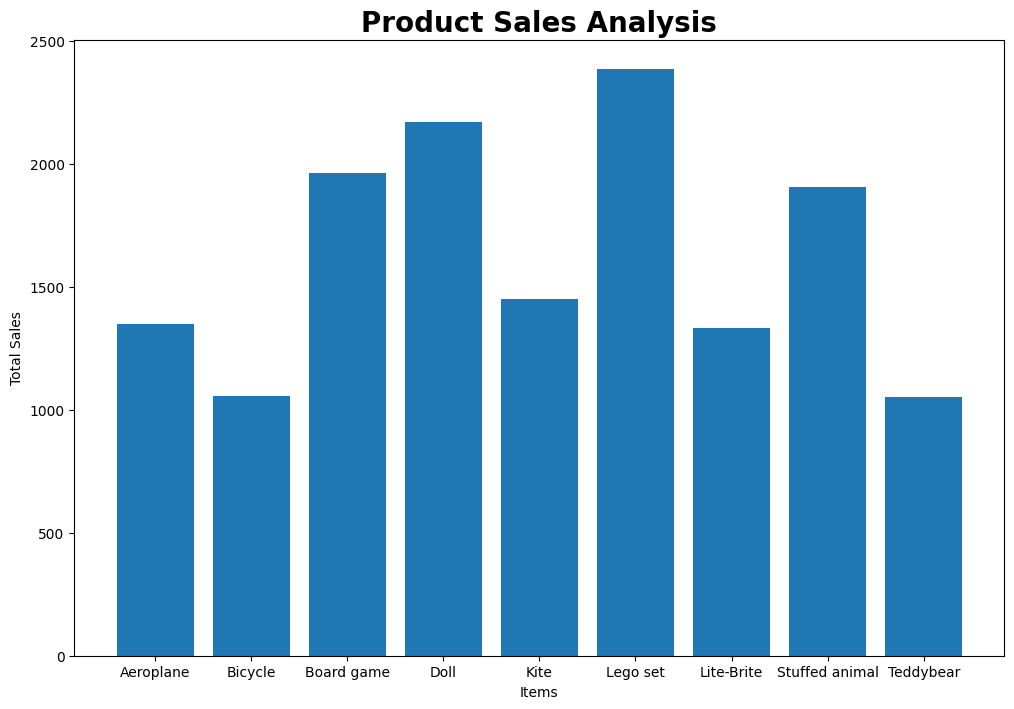

In [6]:
# Bar plot of total sales of each item

# Group dataset by item

grouped_df = df.groupby(by='Item')['Total Sales'].sum()

fig,ax =plt.subplots(figsize=(12,8))
ax.bar(x=grouped_df.index,height=grouped_df)
ax.set(xlabel='Items',ylabel='Total Sales')
plt.title(label="Product Sales Analysis",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

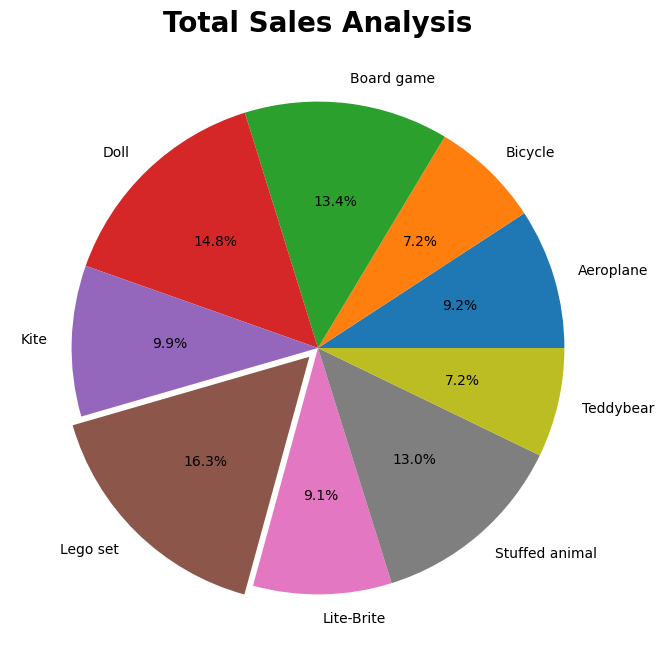

In [7]:
# Pie chart of total sales per item
fig,ax = plt.subplots(figsize=(12,8))
ax.pie(x=grouped_df,labels=grouped_df.index,
       autopct='%1.1f%%',explode=(0,0,0,0,0,0.05,0,0,0))
plt.title(label="Total Sales Analysis",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()

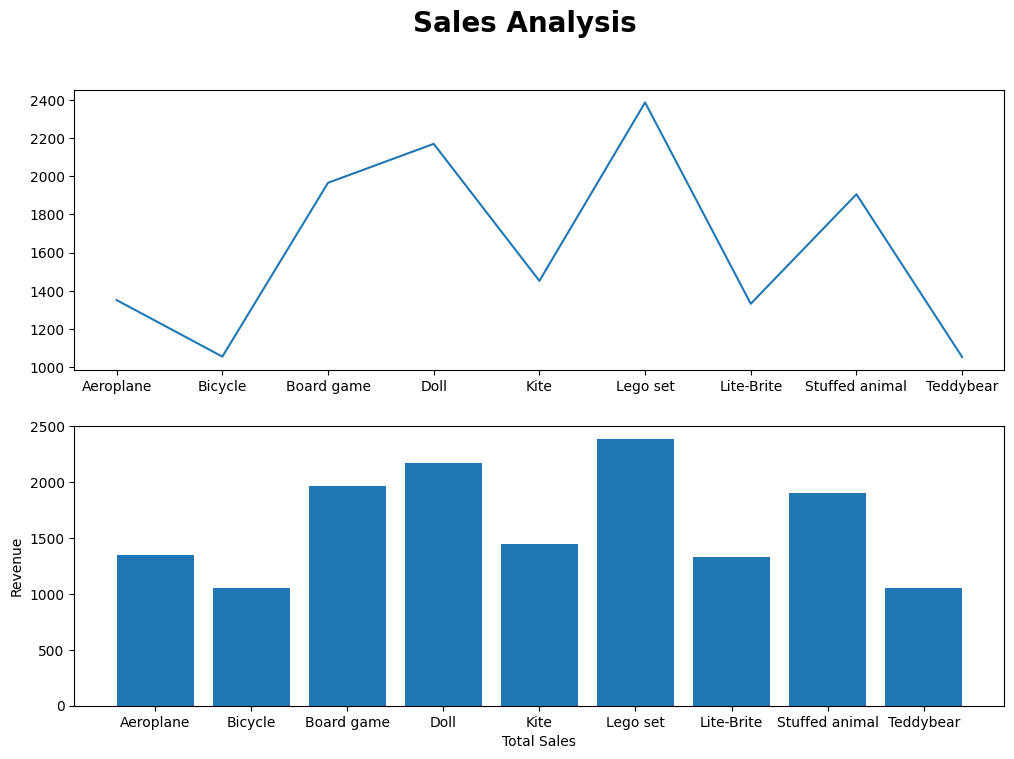

In [8]:
# Bar plot and line plot of total sales
fig,(ax1,ax2) = plt.subplots(figsize=(12,8),nrows=2,ncols=1)
ax1.plot(grouped_df.index, grouped_df)
ax2.bar(grouped_df.index, grouped_df)
plt.xlabel("Total Sales")
plt.ylabel("Revenue")
plt.suptitle(t="Sales Analysis",fontsize=20,fontweight='bold')
plt.show()

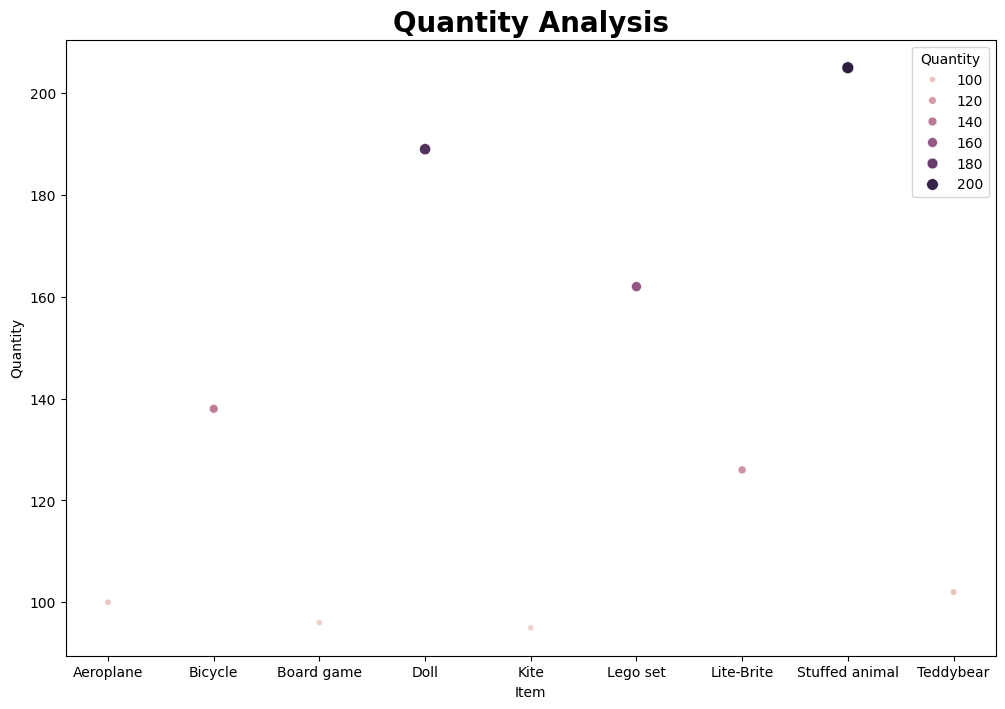

In [9]:
# Scatterplot of items and quantity

df_grouped = df.groupby(by='Item')['Quantity'].sum()

fig,ax = plt.subplots(figsize=(12,8))
sns.scatterplot(x=df_grouped.index, y=df_grouped, ax=ax,
                size=df_grouped, hue=df_grouped)
plt.title(label="Quantity Analysis",
          fontdict={'fontsize':20,'fontweight':'bold'})
plt.show()